## 1. How well do jobs and skills pay?

### Methodology
1. Evaluate median salary for 6 most popular jobs
2. Find median salary per skills for top in-demand skills for data analysts
3. Visualize the highest paying skills and most demanded skills

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df.job_posted_date = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[df['job_country'] == 'United States'].dropna(subset=['salary_year_avg'])
df_VN = df[df['job_country'] == 'Vietnam'].dropna(subset=['salary_year_avg'])

In [3]:
# Identify top 6 most popular jobs
job_titles_US = df_US['job_title_short'].value_counts().head(6).index
job_titles_VN = df_VN['job_title_short'].value_counts().head(6).index

In [4]:
# Filter data for these top 6 job titles
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles_US)]
df_VN_top6 = df_VN[df_VN['job_title_short'].isin(job_titles_VN)]

In [5]:
# Sort the job list by median salary
sorted_job_US = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
sorted_job_VN = df_VN_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

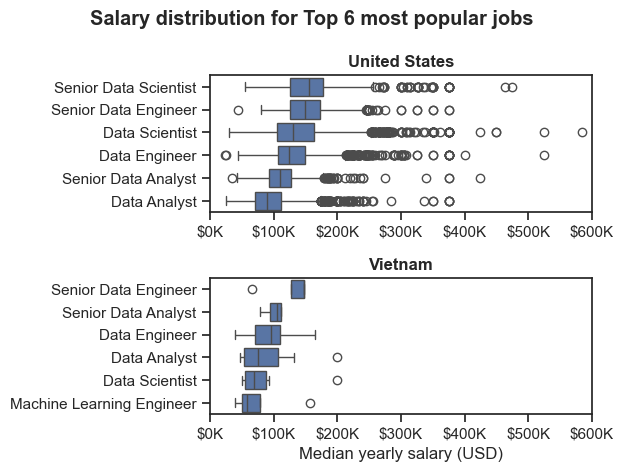

In [20]:
fig, ax = plt.subplots(2,1)
sns.boxplot(df_US_top6, x= 'salary_year_avg', y = 'job_title_short', order=sorted_job_US,vert=False, ax=ax[0])
sns.set_theme(style='ticks')
ax[0].set_title('United States', fontweight='bold')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].set_xlim(0,600_000)

sns.boxplot(df_VN_top6, x= 'salary_year_avg', y = 'job_title_short', order=sorted_job_VN, vert=False, ax=ax[1])
sns.set_theme(style='ticks')
ax[1].set_title('Vietnam', fontweight='bold')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median yearly salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(0,600_000)
fig.suptitle('Salary distribution for Top 6 most popular jobs', fontweight='bold')
fig.tight_layout()
figsize = (10,4)

## 2. Investigate Median salary vs Skill for Data Analysts in the US

In [23]:
df_DA_US = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [24]:
df_DA_US = df_DA_US.explode('job_skills')

In [29]:
# Top paying skills
df_DA_US_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)
df_DA_US_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [34]:
# Most popular skills
df_DA_US_top_skill = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)
df_DA_US_top_skill = df_DA_US_top_skill.sort_values(by='median', ascending=False)
df_DA_US_top_skill

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


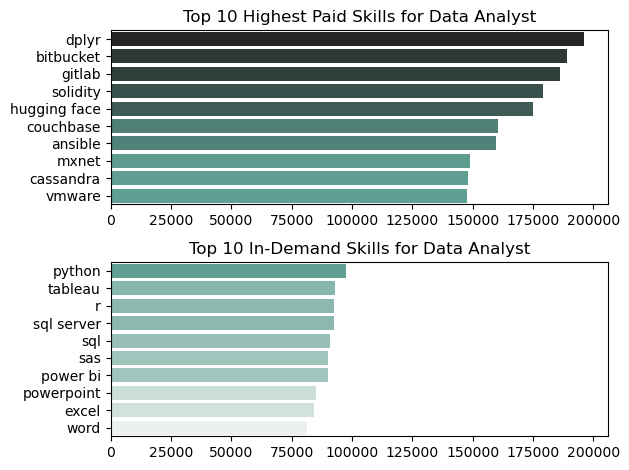

In [66]:
# Plotting

fig,ax = plt.subplots(2,1)

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(df_DA_US_top_pay, x='median', y=df_DA_US_top_pay.index, ax=ax[0], hue='median', palette="dark:#5A9_r")

# Top 10 Most Popular Skills for Data Analysts
sns.barplot(df_DA_US_top_skill, x='median', y=df_DA_US_top_skill.index, ax=ax[1], hue='median', palette="light:#5A9")

#Formatting:
# X value: set the 2nd plot to have the same x value range as 1st plot
ax[1].set_xlim(ax[0].get_xlim())

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend().remove()

ax[1].set_title('Top 10 In-Demand Skills for Data Analyst')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend().remove()

fig.tight_layout(h_pad= 1)